<br>
<br>
## Predicting Bike Sharing Demand on  an Hourly Basis
<br>
#### Machine Learning Project 2017/2018
#### Participants: Samin Hamidi, Leen Shi
 <br>
 <br>


### Dataset
In this data set, historical usage patterns and weather data are combined. The goal is to predict the demand of bike rental in an hourly basis. 
Historical usage patterns are produced by Capital Bikeshare. The city location has been Washington, D.C. 
Dataset provides  hourly rental data which spans two years. We work with the training set. It has been comprised of the first 19 days of each month.
<br>
### WashingtonDC climate
Spring and fall are mild to warm, while winter is chilly with annual snowfall averaging 15.5 inches (39 cm). Winter temperatures average around 38 °F (3 °C) from mid-December to mid-February. Summers are hot and humid with a July daily average of 79.8 °F (26.6 °C) and average daily relative humidity around 66%, which can cause moderate personal discomfort. The combination of heat and humidity in the summer brings very frequent thunderstorms, some of which occasionally produce tornadoes in the area.

### Data Fields

datetime - hourly date + timestamp
<br>
season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
<br>
holiday - whether the day is considered a holiday
<br>
workingday - whether the day is neither a weekend nor holiday
<br>
weather -
<br>
1: Clear, Few clouds, Partly cloudy, Partly cloudy
<br>
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
<br>
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
<br>
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
<br>
temp - temperature in Celsius
<br>
atemp - "feels like" temperature in Celsius
<br>
humidity - relative humidity
<br>
windspeed - wind speed
<br>
casual - number of non-registered user rentals initiated
<br>
registered - number of registered user rentals initiated
<br>
count - number of total rentals (Dependent Variable)
<br>
<br>


### Importing Libraries

In [55]:
#Suppressing Warnings

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [56]:
import numpy as np
import pandas as pd
from math import sqrt

import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

In [57]:
from sklearn.cross_validation import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

<br>
<br>
## Data Preprocessing

In [58]:
# Reading training set 
dataset = pd.read_csv(r"C:\Users\samin\Desktop\Dataset\train.csv")

In [59]:
#Number of Rows and Columns 
print(dataset.shape)

(10886, 12)


In [60]:
dataset.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1/1/2011 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [61]:
dataset.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object


### Skewness?

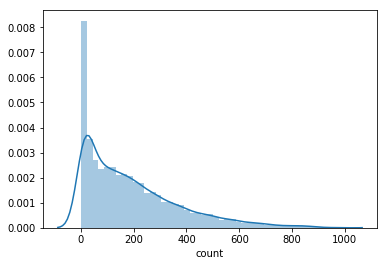

In [62]:
#Check for skewness of the target variable
sns.distplot(dataset['count']);

#Seems skewed to the left so we take the log
dataset['count']=np.log(dataset['count'] + 1) 


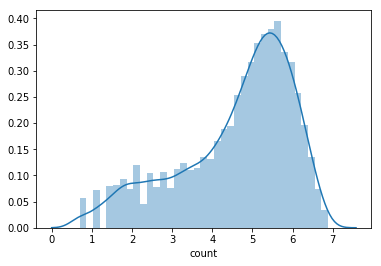

In [63]:
#logged target variable
sns.distplot(dataset['count']);

Not perfectly normal but looks better than the previous condition.


### Leakage Variables?

In [64]:
#Dropping leakage variables: casual and registered. Their sum will tell us the number of counts(target), so they have to be dropped.
dataset = dataset.drop(["casual"], 1)
dataset = dataset.drop(["registered"], 1)

In [65]:
print(dataset.shape)

(10886, 10)



### Missing Values?

In [66]:
#Checking out to see if we have any missing values in each column?
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
count         10886 non-null float64
dtypes: float64(4), int64(5), object(1)
memory usage: 850.5+ KB


In [67]:
dataset.isnull().values.any()

False

#### Observations:
We have one object type: datetime
<br>
We have four categorical variables: season, holiday, workingday and weather
<br>
We have three continous numerical attributes: temp, atemp and windspeed
<br>
Finally, we have two discrete numerical attributes: humidity and count.
<br>

### Data Visualization: Phase1

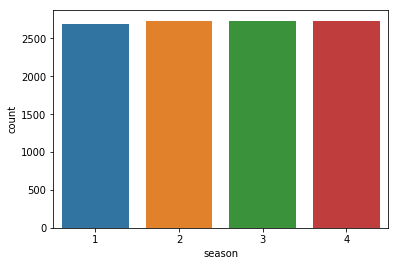

In [68]:
sns.countplot('season',data=dataset)
plt.show()

This is a well balanced attribute. 
<br>
Let't take a look at the relationship it has with target variable 'count'

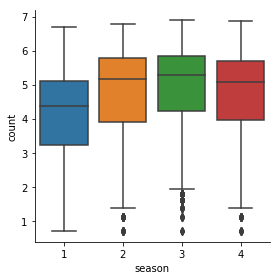

In [69]:
sns.factorplot(x="season", y="count",
                   data=dataset, kind="box")

In seasons 2 and 3, the demands are the highest. 

<br>

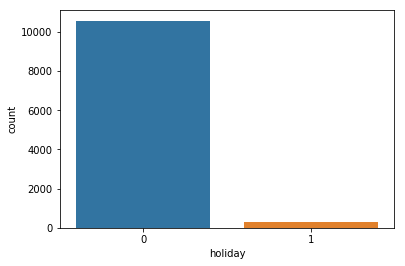

In [70]:
sns.countplot('holiday',data=dataset)     
plt.show()

We choose to drop holiday as it is an unbalanced attribute (more than 10000 0s and less than 1000 1s). Such a monotonous attribute do not have a strong role on our dependent variable. 

##### dropping holiday

In [71]:
dataset = dataset.drop(["holiday"], 1)

<br>

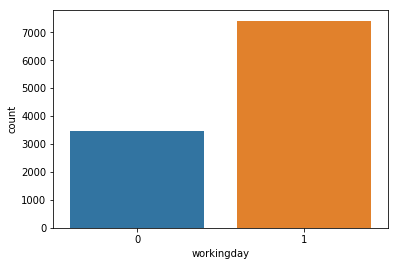

In [72]:
sns.countplot('workingday',data=dataset) 
plt.show()

This attribute can be considered a balanced one. Two third of rows have value 1 and one third value 0. 

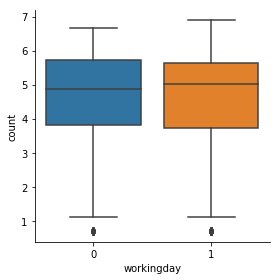

In [73]:
sns.factorplot(x="workingday", y="count",
                   data=dataset, kind="box")

<br>

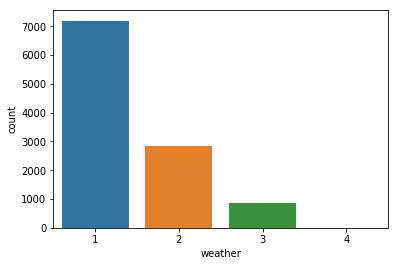

In [74]:
sns.countplot('weather',data=dataset)   
plt.show()

Weather is also a balanced attribute. Two third of population fall into categoy 1 and the rest are divided between 2 and 3.
<br>
Let's take a look at the relationship between this independent variable and target value 'count'.

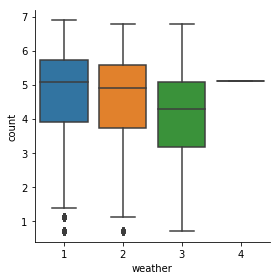

In [75]:
sns.factorplot(x="weather", y="count",
                   data=dataset, kind="box")

The highest demand is in weatehr conditions 1 and 2. The number of demands drop in condition 3 and becomes non existant in condition 4.

<br>

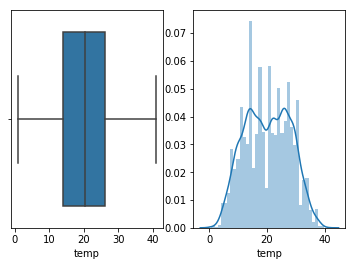

In [76]:
plt.subplot(1,2,1)
sns.boxplot('temp',data=dataset)
plt.subplot(1,2,2)
sns.distplot(dataset['temp'])
plt.show()

temp is a continous variable. The distribution of it looks normal and we won't take its logarithm. 

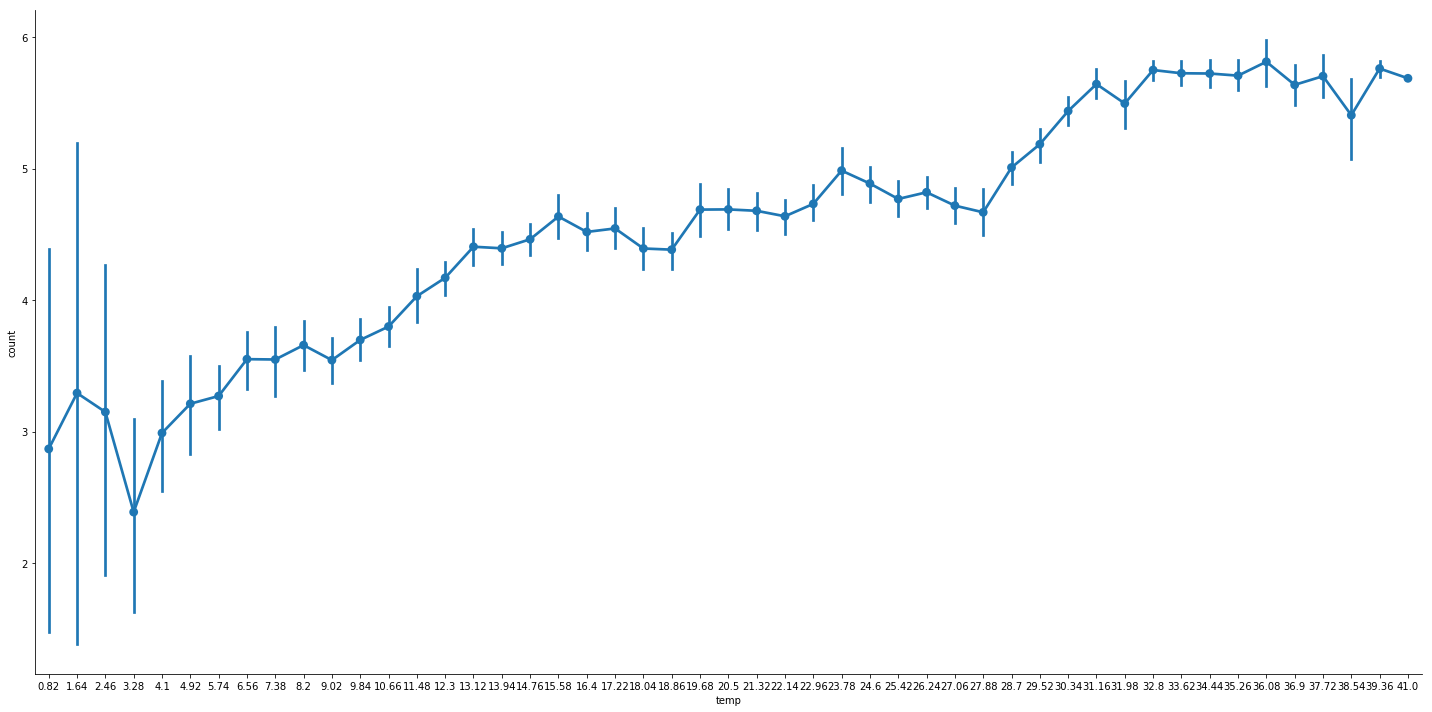

In [77]:
sns.factorplot(x="temp", y="count",
                   data=dataset, kind="point", size=10, aspect=2)

This plot shows there is a positive linear relationship between temp and count. The higher the temperature gets, the higher is the demand. 

<br>

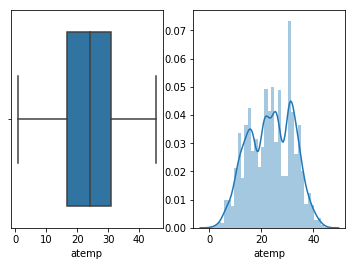

In [78]:
plt.subplot(1,2,1)
sns.boxplot('atemp',data=dataset)
plt.subplot(1,2,2)
sns.distplot(dataset['atemp'])
plt.show()

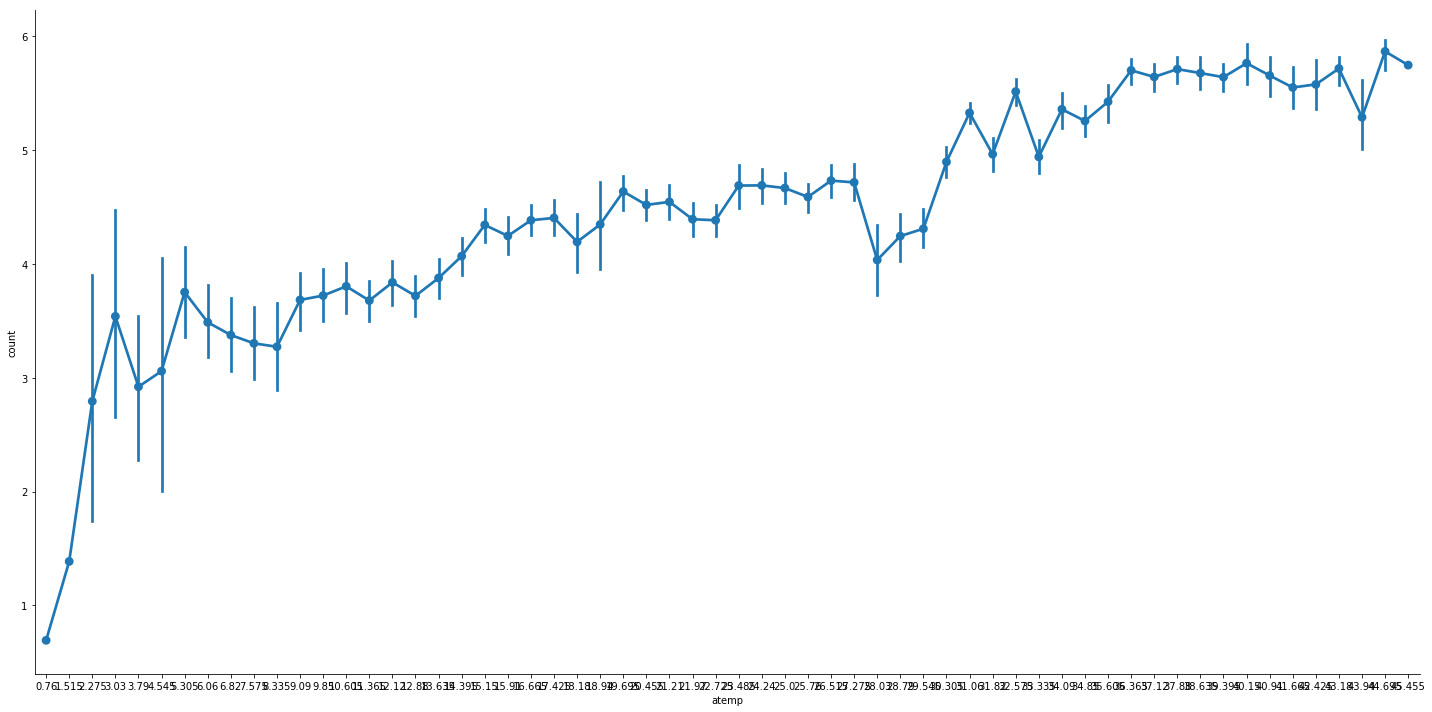

In [79]:
sns.factorplot(x="atemp", y="count",
                   data=dataset, kind="point", size=10, aspect=2)

atemp (the temperature felt) has the same almost normal distribution as temp. 

<br>

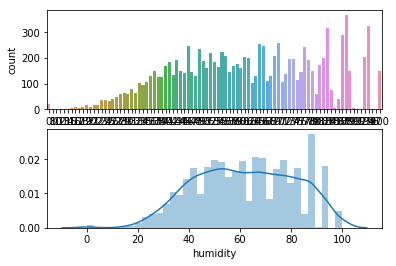

In [80]:
plt.subplot(2,1,1)
sns.countplot('humidity',data=dataset)
plt.subplot(2,1,2)
sns.distplot(dataset['humidity'])
plt.show()

Above we see two plots that show the distribution of humidity. The distplot shows us an almost normal distribution. 

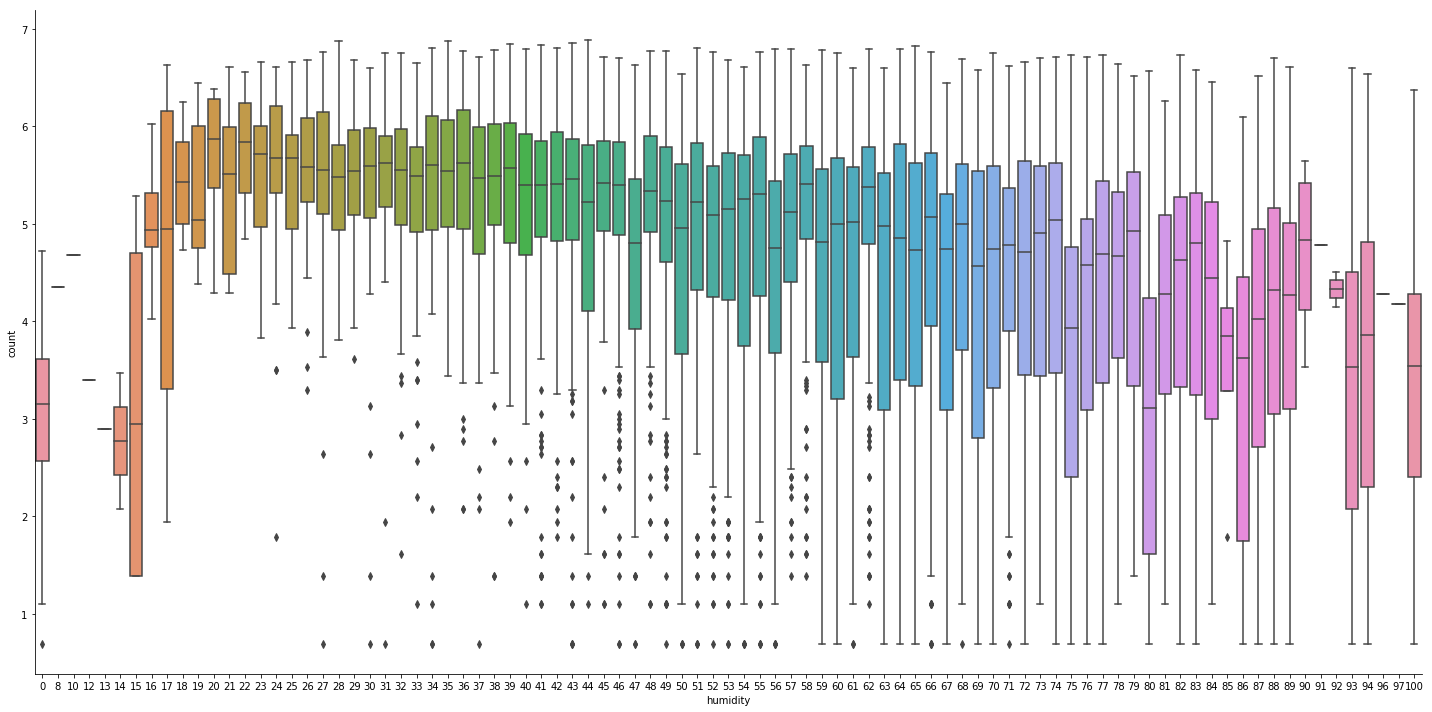

In [81]:
sns.factorplot(x="humidity", y="count",
                   data=dataset, kind="box", size=10, aspect=2)

Humidity has a slightly negaive relationship with target variable count. We wait until drawing the correlation matrix and observing the correlation value. 

<br>

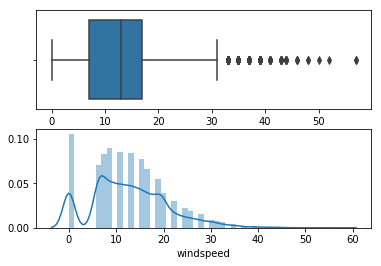

In [82]:
plt.subplot(2,1,1)
sns.boxplot('windspeed',data=dataset)
plt.subplot(2,1,2)
sns.distplot(dataset['windspeed'])
plt.show()

Distribution of windspeed is positively skewed. We take the log and then plot the new distribution of the new values. 

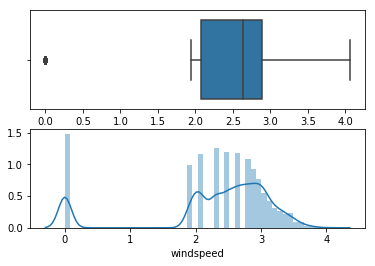

In [83]:
dataset['windspeed']=np.log(dataset['windspeed']+1)

plt.subplot(2,1,1)
sns.boxplot('windspeed',data=dataset)
plt.subplot(2,1,2)
sns.distplot(dataset['windspeed'])
plt.show()

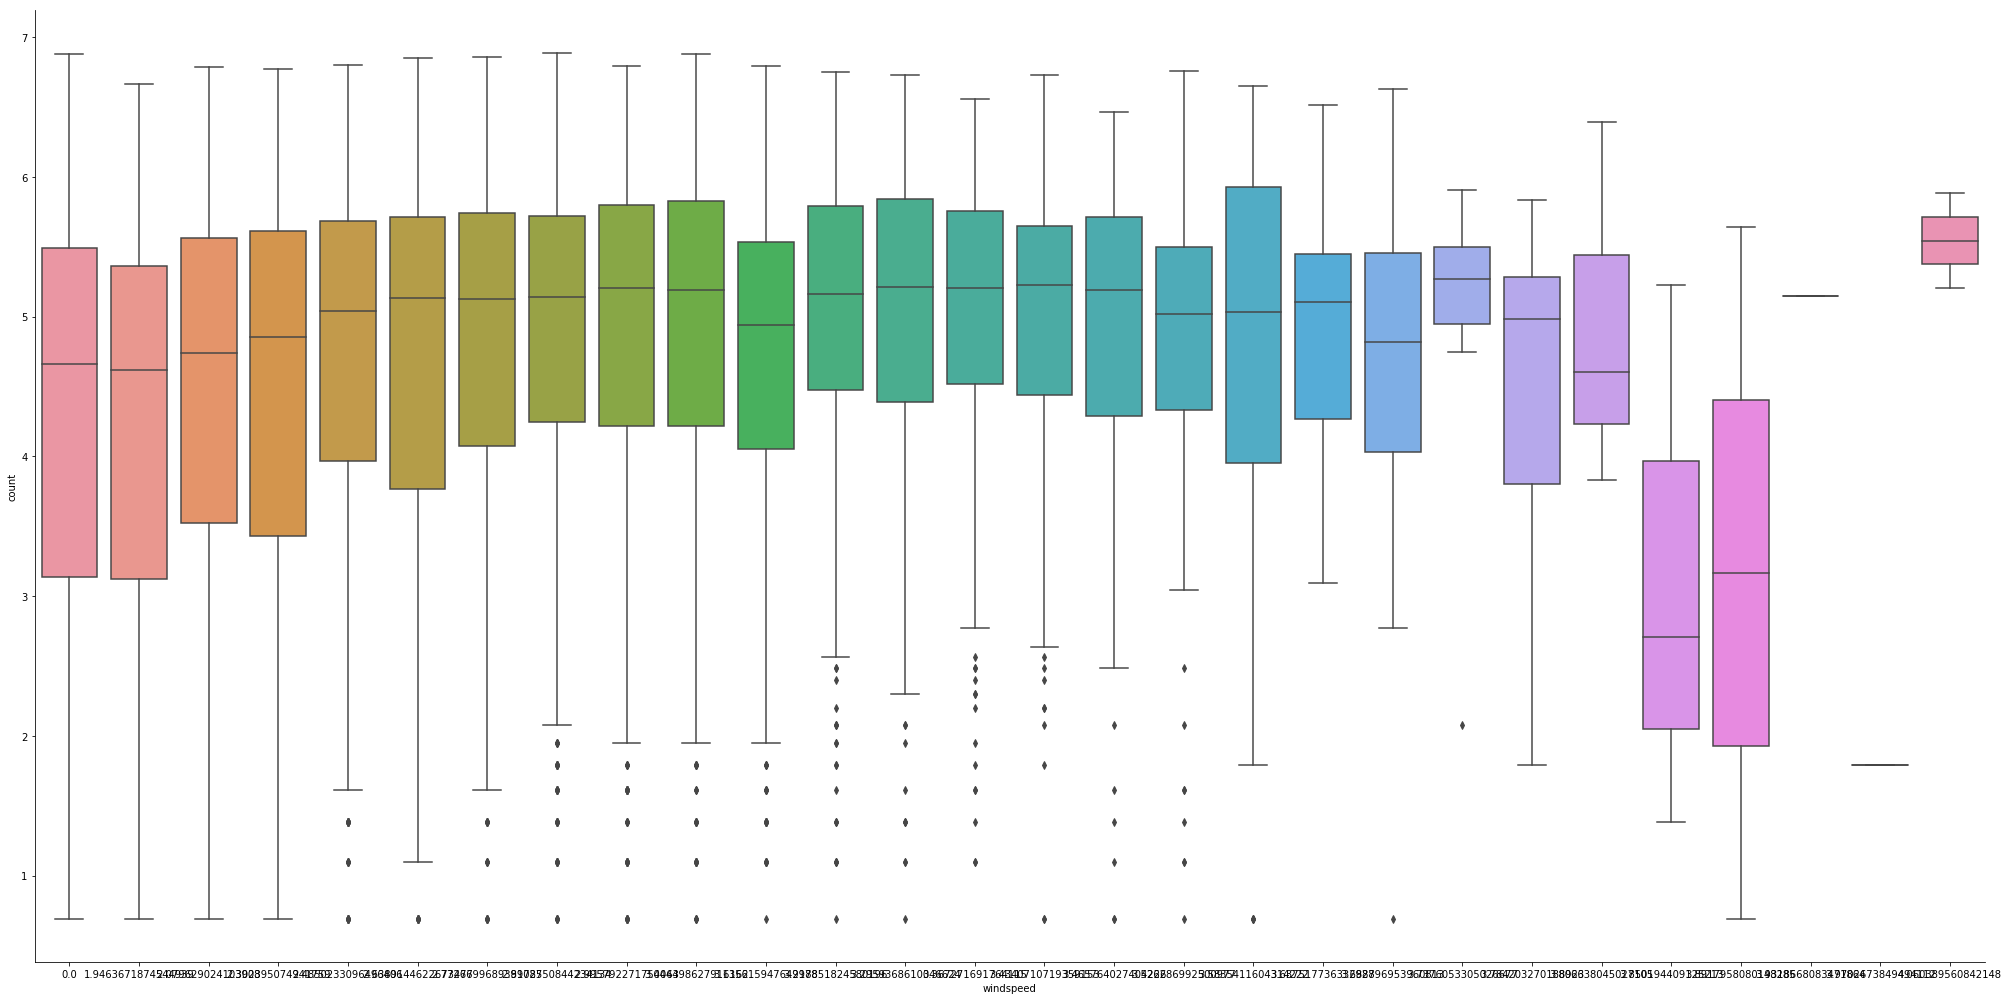

In [84]:
sns.factorplot(x="windspeed", y="count",
                   data=dataset, kind="box", size=14, aspect=2)

<br>
### Feature Engineering

In [85]:
# We dropped one unbalanced variable ('holiday') in the previous section.

# Feature Engineering 
# 1) datetime: extracting information out of this feature

dataset['datetime'] = pd.to_datetime(dataset['datetime'])
dataset['Hour'] = dataset['datetime'].apply(lambda time: time.hour)
dataset['Day'] = dataset['datetime'].apply(lambda time: time.dayofweek)
dataset['Month'] = dataset['datetime'].apply(lambda time: time.month)
dataset['year'] = dataset['datetime'].apply(lambda time:time.year)

In [86]:
# A glimpse of new variables added
dataset.head(2)

,datetime,season,workingday,weather,temp,atemp,humidity,windspeed,count,Hour,Day,Month,year
0,2011-01-01 00:00:00,1,0,1,9.84,14.395,81,0.0,2.833213,0,5,1,2011
1,2011-01-01 01:00:00,1,0,1,9.02,13.635,80,0.0,3.713572,1,5,1,2011


##### dropping datetime

In [87]:
# Useful information has been extracted out of datetime, now we can drop it
dataset = dataset.drop(["datetime"], 1)

In [88]:
# Our dataset now:
dataset.head(2)

,season,workingday,weather,temp,atemp,humidity,windspeed,count,Hour,Day,Month,year
0,1,0,1,9.84,14.395,81,0.0,2.833213,0,5,1,2011
1,1,0,1,9.02,13.635,80,0.0,3.713572,1,5,1,2011


In [89]:
# Categorical attributes: 
# Three categorical attributes remaining (we dropped holiday). We use dataset information to map each ccategory into its literal name.
dataset["season"] = dataset.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
dataset["workingday"] = dataset.workingday.map({0: "off-day", 1 : "Workingday" })
dataset["weather"] = dataset.weather.map({1: "excelent", 2 : "good", 3 : "not-good", 4 :"awful" })

In [90]:
dataset.head(3)

,season,workingday,weather,temp,atemp,humidity,windspeed,count,Hour,Day,Month,year
0,Spring,off-day,excelent,9.84,14.395,81,0.0,2.833213,0,5,1,2011
1,Spring,off-day,excelent,9.02,13.635,80,0.0,3.713572,1,5,1,2011
2,Spring,off-day,excelent,9.02,13.635,80,0.0,3.496508,2,5,1,2011


<br>
### One-Hot endcoding the categorical attributes

In [91]:
# We have three categorical (in form of integer) variables: Season (4 levels), workingday(2 levels) and weather(4 levels)
# We can turn them into dummy variables (one-hot encoding) (the standard method of turning categorical data into numerical)
# First, for each categorical attribute we create a new one-hot encodded dataframe and then at the end concatanate them together.

dummy1 = pd.get_dummies(dataset['season'])
dummy2 = pd.get_dummies(dataset['workingday'])
dummy3 = pd.get_dummies(dataset['weather'])

dataset = pd.concat([dataset, dummy1, dummy2, dummy3], axis=1)

dataset.head(10)

,season,workingday,weather,temp,atemp,humidity,windspeed,count,Hour,Day,...,Fall,Spring,Summer,Winter,Workingday,off-day,awful,excelent,good,not-good
0,Spring,off-day,excelent,9.84,14.395,81,0.000000,2.833213,0,5,...,0,1,0,0,0,1,0,1,0,0
1,Spring,off-day,excelent,9.02,13.635,80,0.000000,3.713572,1,5,...,0,1,0,0,0,1,0,1,0,0
2,Spring,off-day,excelent,9.02,13.635,80,0.000000,3.496508,2,5,...,0,1,0,0,0,1,0,1,0,0
3,Spring,off-day,excelent,9.84,14.395,75,0.000000,2.639057,3,5,...,0,1,0,0,0,1,0,1,0,0
4,Spring,off-day,excelent,9.84,14.395,75,0.000000,0.693147,4,5,...,0,1,0,0,0,1,0,1,0,0
5,Spring,off-day,good,9.84,12.880,75,1.946367,0.693147,5,5,...,0,1,0,0,0,1,0,0,1,0
6,Spring,off-day,excelent,9.02,13.635,80,0.000000,1.098612,6,5,...,0,1,0,0,0,1,0,1,0,0
7,Spring,off-day,excelent,8.20,12.880,86,0.000000,1.386294,7,5,...,0,1,0,0,0,1,0,1,0,0
8,Spring,off-day,excelent,9.84,14.395,75,0.000000,2.197225,8,5,...,0,1,0,0,0,1,0,1,0,0
9,Spring,off-day,excelent,13.12,17.425,76,0.000000,2.708050,9,5,...,0,1,0,0,0,1,0,1,0,0


##### dropping season, workingday and weather

In [92]:
#Drop season, holiday, workingday and weather

dataset = dataset.drop(["season"],1 )
dataset = dataset.drop(["workingday"],1 )
dataset = dataset.drop(["weather"],1 )

dataset.head(2)

,temp,atemp,humidity,windspeed,count,Hour,Day,Month,year,Fall,Spring,Summer,Winter,Workingday,off-day,awful,excelent,good,not-good
0,9.84,14.395,81,0.0,2.833213,0,5,1,2011,0,1,0,0,0,1,0,1,0,0
1,9.02,13.635,80,0.0,3.713572,1,5,1,2011,0,1,0,0,0,1,0,1,0,0


<br>
## Data Visualization: Phase2

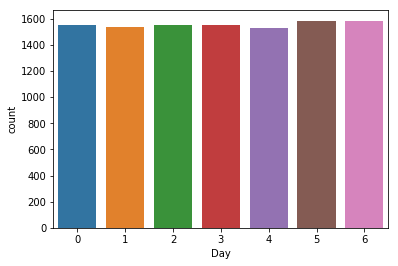

In [93]:
#Univariate analysis for discrete data
#plt.subplot(2,2,i)
sns.countplot('Day',data=dataset) 
plt.show()

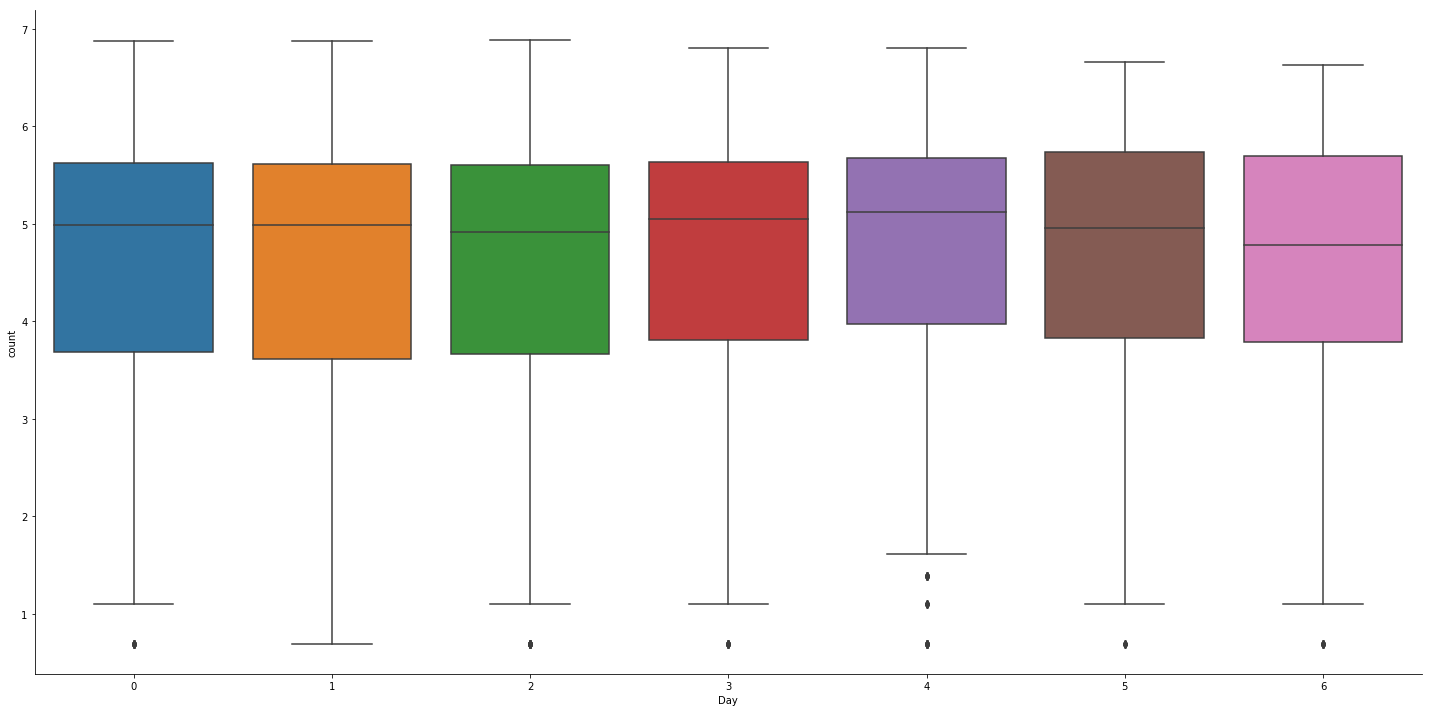

In [94]:
sns.factorplot(x="Day", y="count",
                   data=dataset, kind="box", size=10 , aspect=2)

We cannot infer much from this plot. 

<br>

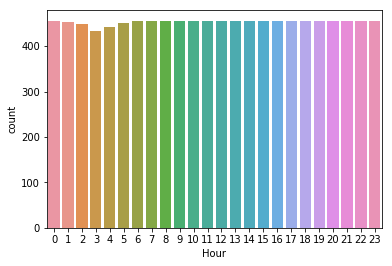

In [95]:
#Univariate analysis for discrete data
#plt.subplot(2,2,i)
sns.countplot('Hour',data=dataset) 
plt.show()

'Hour' is an balanced attribute. 
<br>
Lets take a look at its relationship with target varibale 'count'

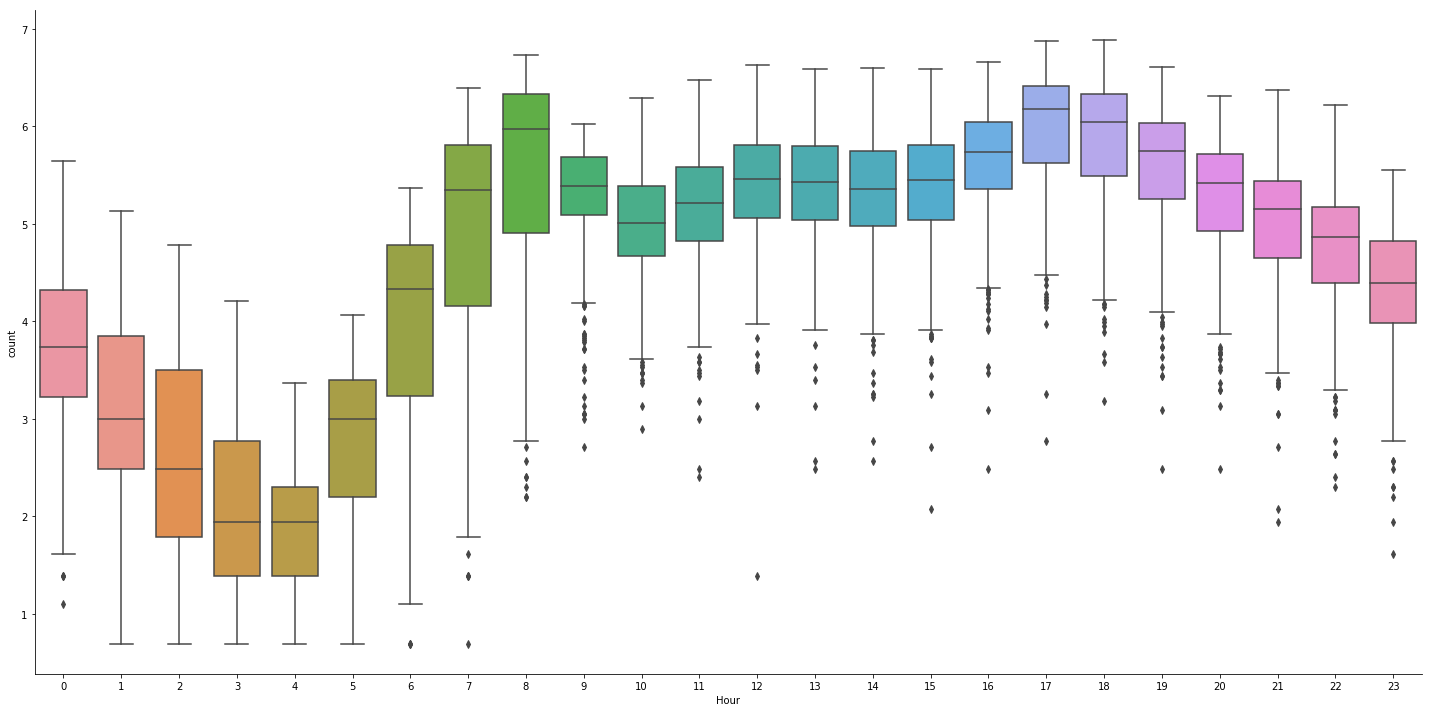

In [96]:
sns.factorplot(x="Hour", y="count",
                   data=dataset, kind="box", size=10 , aspect=2)

We can observe from this plot that in the early hours in the morning (6, 7 and 8) the demand for bikes sees an increase. This makes sense as people wants to comute to work and they need a mean to get there. Also, in the afternoon (16, 17 and 18),we see a higher demand. In these hours people are usually coming back home so, looking for a vehicle to get them there. 

<br>

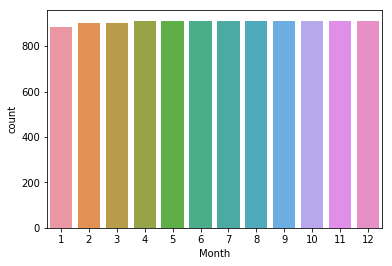

In [97]:
sns.countplot('Month',data=dataset)    
plt.show()

Month is a balanced attribute. 

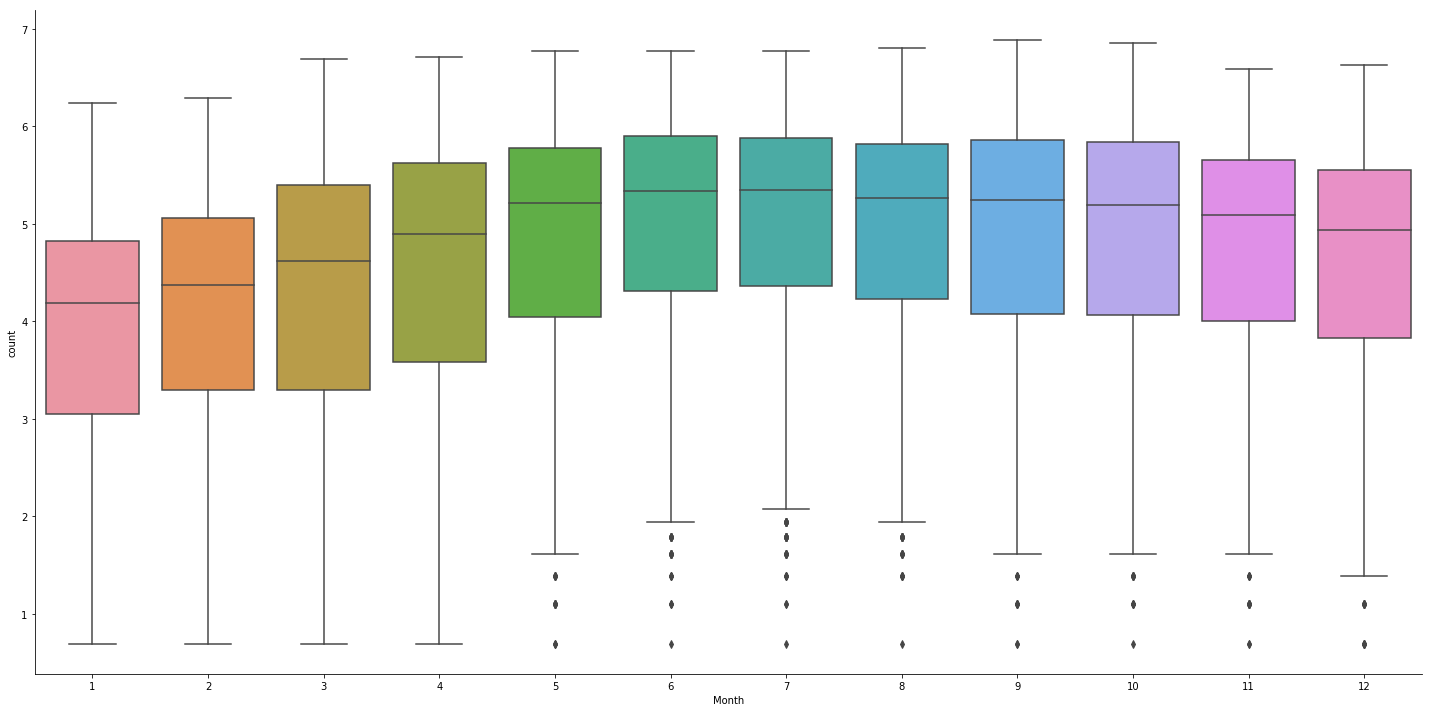

In [98]:
sns.factorplot(x="Month", y="count",
                   data=dataset, kind="box", size=10 , aspect=2 )

we cannot see a sharp increse in the demand in months 4 to 10. We can say that in the first three months and last two months the demand is lower. It makes sense because in these months climate is severe. 

<br>

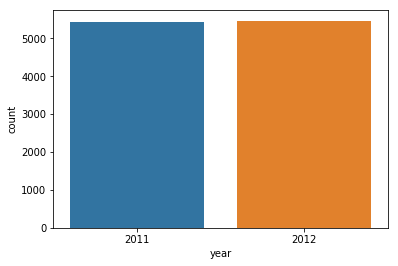

In [99]:
sns.countplot('year',data=dataset) 
plt.show()

year is a well balanced attribute.

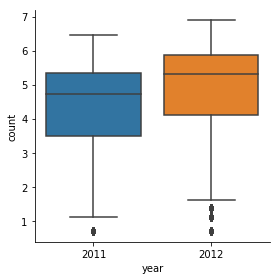

In [100]:
sns.factorplot(x="year", y="count",
                   data=dataset, kind="box")

In year 2012, the demand sees an increase. We can interpret it this way: people are becoming more familiar with bike sharing systems and seeing them as a convinent way of commuting throughout the city. 

<br>
### Correlation Plot

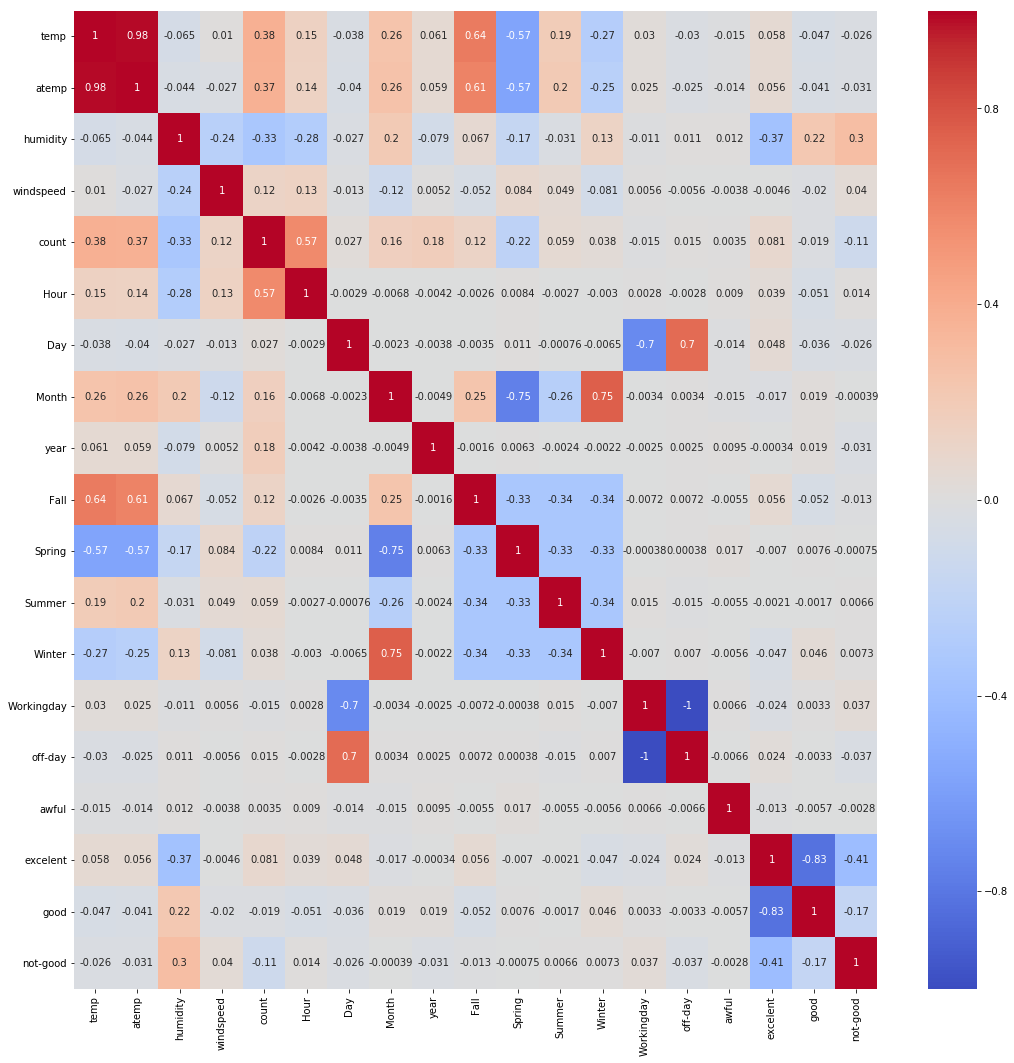

In [101]:
#Visualizing correlation and multicollinearity 

plt.figure(figsize = (18,18))
sns.heatmap(dataset.corr(), cmap='coolwarm', annot = True)

### Observing the correlation between dependent and all the independent variables, we see that the highest  correlation value is 0.38 (count-temp). this is not a very high correlation and we can see that our model is not a linear model. However we decided to use LinearRegression Model in the modeling phase but our expectaion is not high. 
<br>

### Multicollinearity

#### dropping those variables that exhibit multicollinearity >80%
<br>
##### Dropping 'atemp' and 'good'

In [102]:
#temp and atemp: We drop atemp 
dataset = dataset.drop(["atemp"], 1)
#High Multi-collinearity between good and pleasant(-0.83). We drop good
dataset = dataset.drop(["good"], 1)

dataset.head(2)


,temp,humidity,windspeed,count,Hour,Day,Month,year,Fall,Spring,Summer,Winter,Workingday,off-day,awful,excelent,not-good
0,9.84,81,0.0,2.833213,0,5,1,2011,0,1,0,0,0,1,0,1,0
1,9.02,80,0.0,3.713572,1,5,1,2011,0,1,0,0,0,1,0,1,0


#### Drop count

In [103]:
#Preparing our dataset for model selection
#Keep target variable 'count' in a column called y and then drop it from dataset.
y=dataset['count']
dataset = dataset.drop(["count"], 1)

<br>
## Cross Validation: Train_Test Split

## Modeling

### Cross Validation: K-Fold
### Modeling

In [104]:
#Model selection: Cross-validation
#K-Fold 

Algorithms = [LinearRegression(),KNeighborsRegressor(),DecisionTreeRegressor(),BaggingRegressor(),AdaBoostRegressor(), RandomForestRegressor()]
Algorithms_names = [ 'LinearRegression','KNeighborsRegressor','DecisionTreeRegressor','BaggingRegressor','AdaBoostRegressor','RandomForestRegressor']

MSE1 = []
RMSE1 = []
Results1 = {}

for Algorithm in range (len(Algorithms)):
    Alg = Algorithms[Algorithm]
    mse = -cross_val_score(Alg, dataset, y, scoring="neg_mean_squared_error", cv = 5)

    MSE1.append(np.mean(mse))
    RMSE1.append(sqrt(np.mean(mse)))
    

Results1 = {'Modelling Algorithm':Algorithms_names,'MSE':MSE1, 'RMSE':RMSE1}

#Print the result grid
frame = pd.DataFrame(Results1)
frame
    

,Modelling Algorithm,MSE,RMSE
0,LinearRegression,1.043708,1.021620
1,KNeighborsRegressor,0.613556,0.783298
2,DecisionTreeRegressor,0.347874,0.589809
3,BaggingRegressor,0.233202,0.482910
4,AdaBoostRegressor,0.500135,0.707202
5,RandomForestRegressor,0.234216,0.483959


## Parameter Tuning

#### RandomForest

In [105]:
from sklearn.grid_search import GridSearchCV

# Create the parameter grid  
param_grid = {
    'max_depth': [80, 90, 100],
    'n_estimators': [100, 200, 300]
}

# Model
RF = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RF, param_grid = param_grid, cv = 5, scoring='neg_mean_squared_error')
grid_search.fit(dataset, y)

# View the accuracy score (Scoring scheme for RF algorithm is R squared measure: a measure that tells us how close the data are to the fitted regression line)
print('Best score for our dataset:', -grid_search.best_score_)

# View the best parameters for the model found using grid search
print('Best depth:',grid_search.best_estimator_.max_depth) 
print('Best estimators:',grid_search.best_estimator_.n_estimators)

Best score for our dataset: 0.2164171135224278
Best depth: 80
Best estimators: 100


#### BaggingRegressor

In [106]:
# Create the parameter grid  
param_grid = {
    'n_estimators': [10, 20, 30, 40]
}

# Model
BR = BaggingRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = BR, param_grid = param_grid, cv = 5, scoring='neg_mean_squared_error')
grid_search.fit(dataset, y)

# View the accuracy score 
print('Best score for our dataset:', -grid_search.best_score_)

# View the best parameters for the model found using grid search
print('Best estimators:',grid_search.best_estimator_.n_estimators)

Best score for our dataset: 0.22201176803812508
Best estimators: 40


#### DecisionTreeRegressor

In [107]:
# Create the parameter grid  
param_grid = {
    'max_depth': [50, 100, 150, 200],
}

# Model
DT = DecisionTreeRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = DT, param_grid = param_grid, cv = 5,  scoring='neg_mean_squared_error')
grid_search.fit(dataset, y)

# View the accuracy score 
print('Best score for our dataset:', -grid_search.best_score_)

# View the best parameters for the model found using grid search
print('Best depth:',grid_search.best_estimator_.max_depth) 

Best score for our dataset: 0.3426245881429061
Best depth: 50


#### AdaBoostRegressor

In [108]:
# Create the parameter grid  
param_grid = {
    'n_estimators': [50 ,100, 150, 200]
}

# Model
AB = AdaBoostRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = AB, param_grid = param_grid, cv = 5, scoring= 'neg_mean_squared_error')
grid_search.fit(dataset, y)

# View the accuracy score 
print('Best score for our dataset:', -grid_search.best_score_)

# View the best parameters for the model found using grid search 
print('Best estimators:',grid_search.best_estimator_.n_estimators)


Best score for our dataset: 0.4815672330366181
Best estimators: 150
